In [1]:
import os
os.chdir("../")

### Configuration for models

In [7]:
from src.PiuFi.Configuration.config import ModelConfig

In [8]:
config = ModelConfig()

FileNotFoundError: [Errno 2] No such file or directory: 'registry\\models.yaml'

In [ ]:
config.get_agent_model(agent_name = "question_rewriter").get("name")

'gpt-5-mini'

### Read YAML function

In [ ]:
import json
from src.PiuFi.utils.common import render_prompt

In [ ]:
conversation = "No Chat History"

In [ ]:
chats = render_prompt(prompt_name = "missing_handler",
                    user_reply = "It's tcs")

In [ ]:
chats

{'system': 'ROLE\n  - You are a Financial parameter extractor.  \n  - Your task is to extract missing variables from the user\'s natural reply.\n\nINPUTS\n  - "user_reply": The user\'s answer to a missing-parameters question.\n\nTASKS\n  - Extract:\n    - "tickers": Stock ticker symbols (normalize company names to tickers if possible).\n\nRULES\n  - Do not invent values.  ',
 'user': 'User reply: "It\'s tcs"',
 'output_schema': '{\n  "tickers": ["str"]\n}\n',
 'few_shots': []}

### extractor

In [ ]:
from src.PiuFi.Agents.error_handler.param_handling_node import missing_handler_agent

In [ ]:
init_state = {
    "question": "analyze stock using macd and rsi",
    "is_retriever_available": False,
    "n_days": None,
    "direction": None,
    "tickers": [],              # 🚨 empty → will trigger missing
    "missing_list": ["Tickers"],# 🚨 marks ticker missing
    "is_followup": None,
    "is_missing": True,         # 🚨 flag to show missing mode
    "user_reply": "It's TCS",   # what user gives back
    "models_list": ["indicator_analyst_model"],
    "messages": {},
    "rephrased_question": None,
    "rag_rephrased_question": None,
    "financial_rephrased_question": None,
    "technical_rephrased_question": None,
    "final_answer": None
}


In [ ]:
result = await missing_handler_agent(init_state)
print(result)

Command(update={'tickers': ['TCS'], 'user_reply': 'Blah blah'})


### Interrupt

In [ ]:
from src.PiuFi.Agents.error_handler.param_interrupter import param_interrupt

In [ ]:
init_state = {
    "question": "analyze stock using macd and rsi",
    "is_retriever_available": False,
    "n_days": None,
    "direction": None,
    "tickers": [],
    "missing_list": ["Tickers"],
    "is_followup": None,
    "is_missing": True,
    "user_reply": None,
    "models_list": ["indicator_analyst_model"],
    "messages": {},
    "rephrased_question": None,
    "rag_rephrased_question": None,
    "financial_rephrased_question": None,
    "technical_rephrased_question": None,
    "final_answer": None
}

In [ ]:
result = await param_interrupt(init_state)

RuntimeError: Called get_config outside of a runnable context

### Graph

In [2]:
from main import graph

In [3]:
graph = graph()

In [4]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

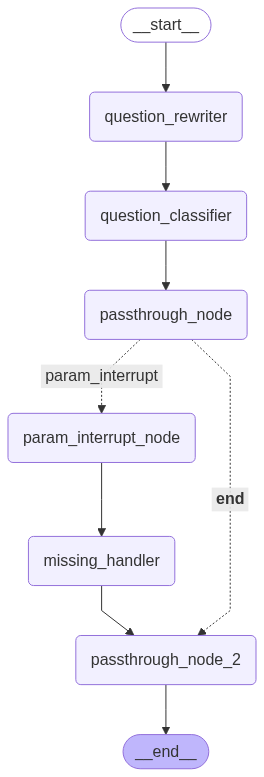

In [5]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [ ]:
user_input = "analyze stock using macd and rsi"

In [ ]:
input_data = {
            "question": user_input
        }

In [ ]:
result = await graph.ainvoke(
            input = input_data,
            config = {
                "configurable": {
                    "thread_id": 1
                }
            }
        )

In [ ]:
result

{'question': 'analyze stock using macd and rsi',
 'is_retriever_available': False,
 'n_days': None,
 'direction': None,
 'tickers': [],
 'missing_list': [],
 'is_followup': None,
 'is_missing': None,
 'user_reply': None,
 'models_list': ['indicator_analyst_model'],
 'messages': {},
 'rephrased_question': 'How can I analyze a stock using MACD and RSI indicators?',
 'rag_rephrased_question': 'What is the method to analyze a stock with MACD and RSI indicators?',
 'financial_rephrased_question': 'What are the steps to analyze a stock using MACD and RSI?',
 'technical_rephrased_question': 'How to perform stock analysis using MACD and RSI indicators?',
 'final_answer': None,
 '__interrupt__': [Interrupt(value={'message': 'There are missing inputs required to go through: . Please provide them.'}, id='7fddd172d74db3db48418d09385990fc')]}

In [ ]:
result = await graph.ainvoke(
            {
                **result,
                "user_reply": "It's tcs"
            },
            config = {
                "configurable": {
                    "thread_id": 1
                }
            }
        )

In [ ]:
result

{'question': 'analyze stock using macd and rsi',
 'is_retriever_available': False,
 'n_days': None,
 'direction': None,
 'tickers': [],
 'missing_list': [],
 'is_followup': None,
 'is_missing': None,
 'user_reply': None,
 'models_list': ['indicator_analyst_model'],
 'messages': {},
 'rephrased_question': 'How can I analyze a stock using MACD and RSI indicators?',
 'rag_rephrased_question': 'What is the method to analyze a stock with MACD and RSI indicators?',
 'financial_rephrased_question': 'What are the steps to analyze a stock using MACD and RSI indicators?',
 'technical_rephrased_question': 'What is the analysis process for a stock using MACD and RSI indicators?',
 'final_answer': None,
 '__interrupt__': [Interrupt(value={'message': 'There are missing inputs required to go through: . Please provide them.'}, id='d6c06e5681431bf8306b20d7a440813b')]}